[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_mmdet.ipynb)

## 0. Preperation

- Install latest version of SAHI and MMDetection:

In [ ]:
!pip install -U torch sahi mmdet mmengine 'mmcv>=2.0.0'

In [ ]:
import os
os.getcwd()

- Import required modules:

In [ ]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_cascade_mask_rcnn_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a cascade mask rcnn model and two test images:

In [ ]:
# download cascade mask rcnn model&config
model_path = 'models/cascade_mask_rcnn.pth'
download_mmdet_cascade_mask_rcnn_model(model_path)
config_path = download_mmdet_config(model_name="cascade_rcnn", config_file_name="cascade-mask-rcnn_r50_fpn_1x_coco.py",)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a MMDetection Model

- Instantiate a detection model by defining model weight path, confing path and other parameters:

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='mmdet',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.4,
    image_size=640,
    device="cpu", # or 'cuda:0'
)

load checkpoint from local path: models/cascade_mask_rcnn.pth


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

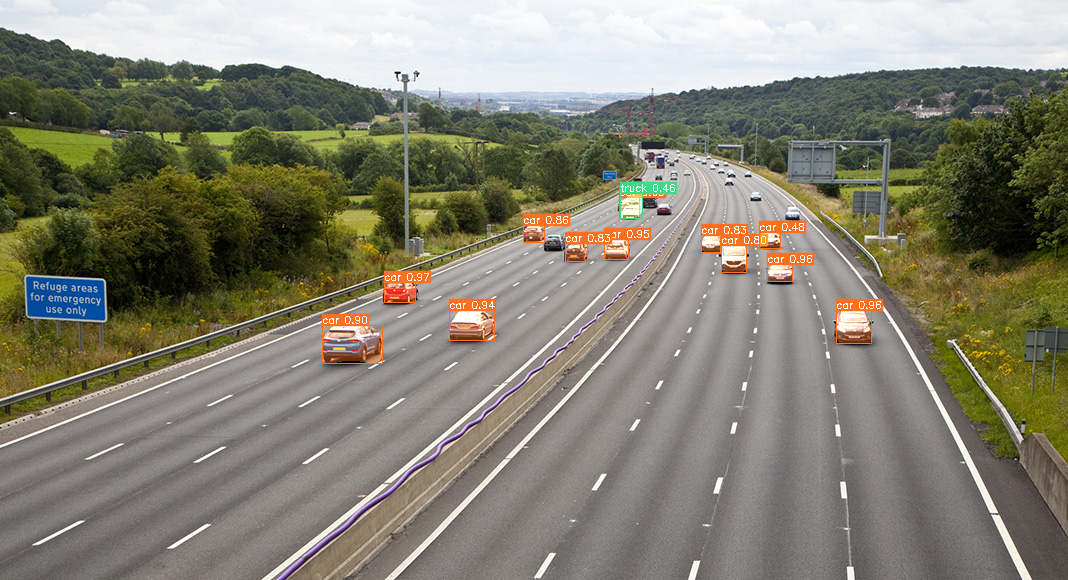

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a MMDetection Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 320,
    slice_width = 320,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 12 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

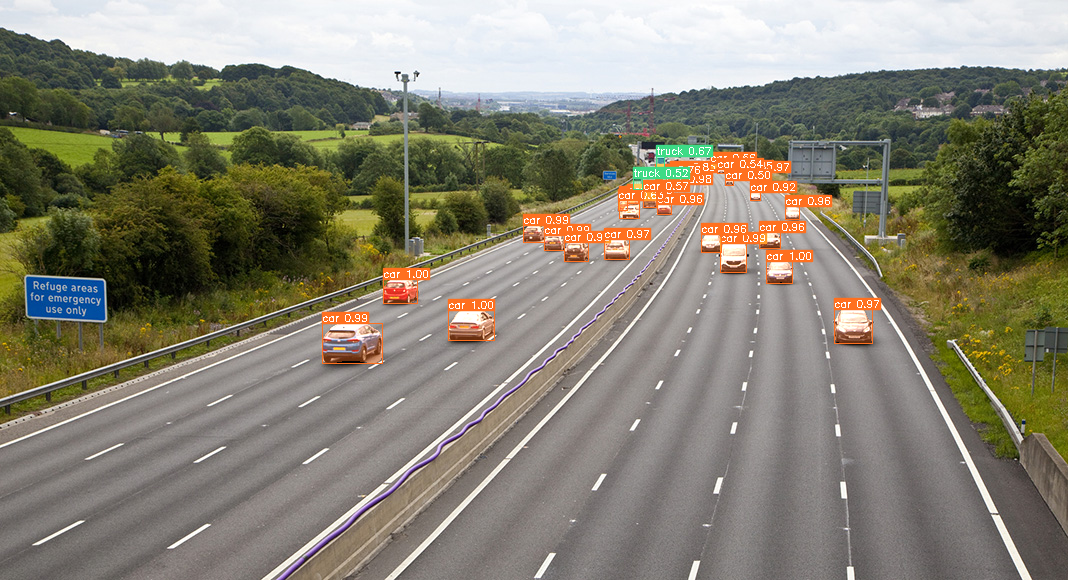

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(448, 310, 494, 340), w: 46, h: 30>,
    mask: <sahi.annotation.Mask object>,
    score: PredictionScore: <value: 0.9975390434265137>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[0]

{'image_id': None,
 'bbox': [448, 310, 46, 30],
 'score': 0.9975390434265137,
 'category_id': 2,
 'category_name': 'car',
 'segmentation': [[460,
   310,
   455,
   315,
   455,
   316,
   454,
   317,
   454,
   318,
   452,
   320,
   452,
   321,
   451,
   322,
   451,
   323,
   449,
   325,
   449,
   327,
   448,
   328,
   448,
   335,
   449,
   336,
   449,
   338,
   451,
   340,
   486,
   340,
   487,
   339,
   488,
   339,
   490,
   337,
   491,
   337,
   493,
   335,
   493,
   334,
   494,
   333,
   494,
   325,
   493,
   324,
   493,
   319,
   492,
   318,
   492,
   317,
   490,
   315,
   489,
   315,
   487,
   313,
   486,
   313,
   484,
   311,
   482,
   311,
   481,
   310]],
 'iscrowd': 0,
 'area': 1199}

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[0]

{'image_id': 1,
 'bbox': [448, 310, 46, 30],
 'score': 0.9974352717399597,
 'category_id': 2,
 'category_name': 'car',
 'segmentation': [[465,
   310,
   464,
   311,
   460,
   311,
   459,
   312,
   458,
   312,
   457,
   313,
   457,
   314,
   455,
   316,
   455,
   317,
   452,
   320,
   452,
   321,
   450,
   323,
   450,
   324,
   449,
   325,
   449,
   329,
   448,
   330,
   448,
   334,
   449,
   335,
   449,
   338,
   450,
   339,
   451,
   339,
   452,
   340,
   453,
   340,
   454,
   339,
   458,
   339,
   459,
   338,
   466,
   338,
   467,
   337,
   471,
   337,
   472,
   338,
   481,
   338,
   482,
   339,
   483,
   339,
   484,
   340,
   487,
   340,
   492,
   335,
   493,
   335,
   493,
   334,
   494,
   333,
   494,
   321,
   493,
   320,
   493,
   319,
   490,
   316,
   489,
   316,
   486,
   313,
   485,
   313,
   484,
   312,
   483,
   312,
   482,
   311,
   477,
   311,
   476,
   310]],
 'iscrowd': 0,
 'area': 1118}

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
result.to_imantics_annotations()[0]

<imantics.annotation.Annotation>

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[0]

<Detection: {
    'id': '633309e4f0d5345e36349674',
    'attributes': BaseDict({}),
    'tags': BaseList([]),
    'label': 'car',
    'bounding_box': BaseList([
        0.41947565543071164,
        0.5344827586206896,
        0.04307116104868914,
        0.05172413793103448,
    ]),
    'mask': None,
    'confidence': 0.9975390434265137,
    'index': None,
}>

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "mmdet"
model_path = model_path
model_config_path = config_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 640
slice_width = 640
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=config_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/
load checkpoint from local path: models/cascade_mask_rcnn.pth


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 4 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:15<00:31, 15.53s/it]

Prediction time is: 15474.02 ms
Performing prediction on 2 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:27<00:13, 13.36s/it]

Prediction time is: 11749.64 ms
Performing prediction on 2 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:37<00:00, 12.40s/it]

Prediction time is: 9733.20 ms
Prediction results are successfully exported to runs/predict/exp16
